# CASE STUDY - DiGiFes by RAKAMIN

We are pretend to work in a retail online company. We are given with a dataset contains all customer transaction from 2009 - 2011. We are asked to analyzed sales performance in 3 years.

Here is the explanation for each column:

**Attributes**

- **Invoice**: contains 6 digits of number and unique for every transaction. If the code begins with 'C' letter, it means a cancellation
- **StockCode**: Product code. 5 digits and unique for every different product
- **Description**: The name of product
- **Quantity**: Number of product per transactions
- **InvoiceDate**: Time and date invoice, the day when transactions is made
- **UnitPrice**: Price per unit product in sterling
- **Customer ID**: 5 digits number and unique for every customer
- **Country**: Country where the customer live

## Section 1 : Analyzed Average Revenue Per Year

#### 1. Make a new column named 'Year' that extract year from 'InvoiceDate

In [5]:
# Import all package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset and return the first 10 rows
df_retail = pd.read_csv("online_retail_II.csv")
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [19]:
# Returns the last 5 rows from the dataset
df_retail.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [22]:
# Check the size of row and column
df_retail.shape

(1067371, 8)

In [21]:
# Check data types for every column
df_retail.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [11]:
# Convert the 'InvoiceDate' to datetime
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

# Check the data type first
df_retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [49]:
df_retail.shape

(1067371, 9)

In [12]:
# Add a new column 'Year' and extract year from 'InvoiceDate'
df_retail.insert(5, column='Year', value=df_retail['InvoiceDate'].dt.year)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom


#### 2. Filtering the data with constrain below:
     - Minimal Quantity is 1 (not 0 or minues)
     - 'Invoice' is not allowed to be 'C' letter because it signs the cancellation of order or do not
         complete the order

In [14]:
# Make a new variable and filter the 'Quantity' larger than 0
df_retail_filter = df_retail[df_retail['Quantity'] > 0]
df_retail_filter.shape

(1044421, 9)

We check the shape and see the number of row. The row number become 1044421 from 1067371. It means the filtering is success. For the next filter, the number of row must be less than 1044421

In [15]:
# Filter the 'Invoice' that does not contain 'C' letter
df_retail_filter = df_retail_filter[df_retail_filter['Invoice'].str.contains('C') == False]
df_retail_filter.head()
df_retail_filter.shape

(1044420, 9)

#### 3. Make a Revenue column 

In [16]:
# Make a new column named 'Revenue' as the result of product between 'Quantity' with 'Price'
df_retail_filter.drop(['Revenue'], axis=1, inplace=True)

KeyError: "['Revenue'] not found in axis"

In [17]:
df_retail_filter.insert(7, column='Revenue', value=df_retail_filter['Quantity']*df_retail_filter['Price'])
df_retail_filter.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Revenue,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,83.4,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.0,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.0,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,100.8,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,30.0,13085.0,United Kingdom


#### 4. Calculate the average revenue for each year and make the visualization

In [18]:
# The 'customer ID' is still in float64 type, convert into int
df_retail_filter['Customer ID'] = df_retail_filter['Customer ID'].fillna(0)
df_retail_filter['Customer ID'] = df_retail_filter['Customer ID'].astype(int)
df_retail_filter.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Year                    int64
Price                 float64
Revenue               float64
Customer ID             int32
Country                object
dtype: object

In [19]:
df_retail_filter.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Revenue,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,83.4,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.0,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.0,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,100.8,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,30.0,13085,United Kingdom


In [21]:
avg_revenue = df_retail_filter.groupby(['Year']).mean()
avg_revenue = avg_revenue.filter(['Year','Revenue'])
avg_revenue

,Revenue
Year,
2009,18.713273
2010,19.908987
2011,20.058767


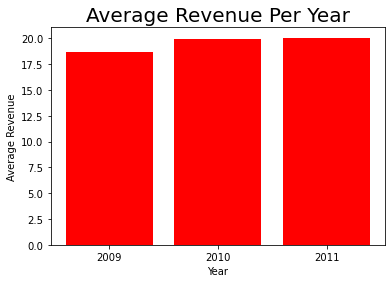

In [22]:
# Create a bar chart for an average revenue
plt.bar(['2009','2010','2011'], avg_revenue['Revenue'], color='red')

plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Per Year', size=20)
plt.show()

#### 5. Interprete the result from question 4

- The average revenue of retail sales increse year by year. But, it is not significantly increase
- It indicates that year by year, my hypothesis say that needs of the people increase so that they will buy more goods than before.

## Section 2 : Analyzed Customer Transaction Per Year

#### 1. Filter the data sales (using data that has already filtered in section 1) with constrain that 'CustomerID' is not null value and save it to Finished variable

In [23]:
# Call the filtered data from section 1
df_retail_filter

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Revenue,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,83.40,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.00,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,81.00,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,100.80,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,30.00,13085,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2011,2.10,12.60,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,2011,4.15,16.60,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,2011,4.15,16.60,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,2011,4.95,14.85,12680,France


In [29]:
# check wheather or not the 'customer Id' has null value
null_customer = df_retail_filter['Customer ID'].isna().sum()
null_customer

0

In [30]:
# df_retail_filter has already not had null value in 'Customer ID'
# Save to finished variable
finished = df_retail_filter

#### 2. Grouping customer data that cancel their orders by doing the detection to the 'Invoice' which contains 'C' and save it to Cancel variable 

In [31]:
# Use df_retail data
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,2009,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,2009,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2009,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2009,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2011,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,2011,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,2011,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,2011,4.95,12680.0,France


In [38]:
# Filter df_retail data that 'Invoice' contains cancel orders
cancel = df_retail[df_retail['Invoice'].str.contains('C')]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Year,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2009,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,2009,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,2009,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2009,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2009,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,2011,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,2011,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,2011,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,2011,1.25,17315.0,United Kingdom


In [37]:
# Check size of cancel
cancel.size
cancel.shape

(19494, 9)

#### 3. Calculate total transaction finished and total transaction cancel for each year and visualize the result 

In [60]:
# count the finished transaction grouping by year
count_finished = finished.groupby(['Year']).count()
count_finished_per_year = count_finished.filter(['Invoice'])
count_finished_per_year

,Invoice
Year,
2009,44123
2010,510694
2011,489603


In [61]:
# count the cancel transaction grouping by year
count_cancel = cancel.groupby(['Year']).count()
count_cancel_per_year = count_cancel.filter(['Invoice'])
count_cancel_per_year

,Invoice
Year,
2009,1015
2010,9919
2011,8560


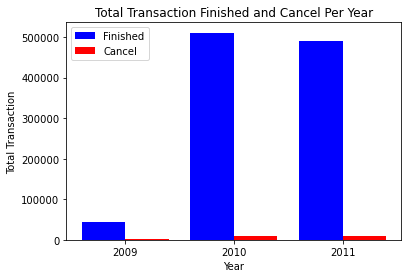

In [62]:
# Make a double bar chart to compare total finished and cancel transaction
year = ['2009','2010','2011']
year_axis = np.arange(len(year))
width = 0.4

plt.bar(year_axis, count_finished['Invoice'], width, label= 'Finished', color = 'blue')
plt.bar(year_axis+width, count_cancel['Invoice'], width, label= 'Cancel', color = 'red')

plt.xticks(year_axis+0.2, year)
plt.xlabel('Year')
plt.ylabel('Total Transaction')
plt.title('Total Transaction Finished and Cancel Per Year')
plt.legend()
plt.show()

#### 4. Calculate the cancelation rate for each year

In [67]:
# Count all transaction per year
all_transaction = df_retail_filter.groupby(['Year']).count()
count_all_transaction = all_transaction.filter(['Invoice'])
count_all_transaction

# Calculate cancellation rate
cancel_rate = (count_cancel/count_all_transaction)*100
cancellation_rate = cancel_rate.filter(['Invoice'])
cancellation_rate

,Invoice
Year,
2009,2.300388
2010,1.942259
2011,1.748355


<AxesSubplot:ylabel='Invoice'>

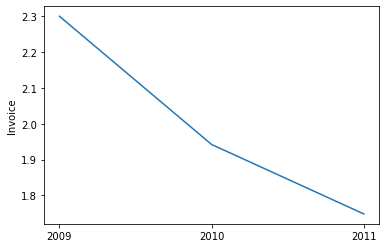

In [68]:
# Create line chart for cancellation rate
year = ['2009','2010','2011']
sns.lineplot(data = cancellation_rate, x = year, y = "Invoice")

#### 5. Interprete the result from graph above

- We can easily understand and make conclusion that due to the decreasing of cancellation rate, people around the world tend to buy the product they like. As I mentioned in section 1, this graph will strength my hypothesis that the needs of the people increase so that the product they bought also increase. It is proven by the cancellation rate decrease year by year

- Actually, there more insights that could be gained from this dataset to deep dive into why people tend to buy a new product and keep increasing year by year